# Trabajo Integrador Parte 4

Nombre: Lucas Musciano

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={
    'axes.facecolor': 'black',
    'figure.facecolor': 'black',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.titlecolor': 'white'
})

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [3]:
DATASET_PATH = "./data/pokemon/"

In [9]:
# En el caso del dataset de Pokemon, el archivo de columns parece no estar redactado de la manera correcta.
# y como el archivo pokemon.csv tiene en su primera fila los nombres de las columnas, nos basta con:
data = pd.read_csv(DATASET_PATH + 'pokemon.csv')

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [20]:
data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [60]:
# Para no escribir las columnas a mano, filtramos las numéricas y corregimos a mano
numerical_features = list(data.select_dtypes(include=[np.number]).columns)
numerical_features.append('capture_rate')


# Las que quedan, son no-numéricas.
non_numerical_features = list(set(data.columns)-set(numerical_features))

#type1 y type2 resultan categóricas (las guardamos a parte)
categorical_features = ['type1','type2']

numerical_features.remove('is_legendary')

target = "is_legendary"

['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'defense', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'capture_rate']


Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [63]:
data['percentage_male'].value_counts()

percentage_male
50.0     501
88.1     111
0.0       27
24.6      24
100.0     19
75.4      19
11.2       2
Name: count, dtype: int64

In [35]:
y = data[target].values

In [36]:
non_legendary_mask = y == 0
legendary_mask = y > 0

In [37]:
y_class = y.copy()

y_class[non_legendary_mask] = 0
y_class[legendary_mask] = 1

In [ ]:
y_class

In [38]:
pd.get_dummies(data[categorical_features])

,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
798,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [108]:
# En este paso observamos que hay un valor ensuciado para la columna capture_rate, por lo cual
# vamos a corregirlo a mano (es sólo una ocurrencia)
mask = data['capture_rate'] == '30 (Meteorite)255 (Core)'
data.loc[mask, 'capture_rate'] = 255

# Luego detectamos algunos NaNs, así que veremos en que columnas están
nans_per_column = data[numerical_features].isna().sum()
print(nans_per_column[nans_per_column > 0])

# En este print vemos NaNs en la altura, el peso y el ratio de sexo masculino.
# Los de altura y peso son bastante bajos, así que los reemplazamos con la media de la columna.
# Los del ratio de sexo masculino es un poco más alto, pero contando los valores posibles en el dataset, vemos
# que más de la mitad tienen un valor de 50, así que seteamos ese valor:
data['height_m'].fillna(data['height_m'].mean(), inplace=True)
data['weight_kg'].fillna(data['weight_kg'].mean(), inplace=True)
data['percentage_male'].fillna(50,inplace=True)



Series([], dtype: int64)


In [140]:
# Para realizar la selección de componentes deseados en el PCA, ibamos a buscar los que acumulen más
# del 80% de la explicación de la varianza, como en el anterior apartado del TPI.
# Sin embargo, este valor se fue reduciendo para ver como variaban las métricas de los distintos
# modelos, consiguiendo métricas muy similares con tan solo 2 componentes principales (en vez de 14,
# lo que quedaba si intentabamos acumular el 80% de la varianza total). Esto probablemente se explica 
# porque la variabilidad de las estadísticas de cada pokemon son muy amplias, pero pocos son legendarios
# y muchas no tienen gran influencia en esto (el PCA no tiene en cuenta el target para su cómputo, después de todo).

ndata_centered = StandardScaler().fit_transform(data[numerical_features])
pca = PCA(n_components=3).fit(ndata_centered)

explain_acumulated = np.cumsum(pca.explained_variance_ratio_)
print(np.argmax(explain_acumulated >= 0.3) +1)

X_transformed = pca.transform(ndata_centered)



3


<Axes: >

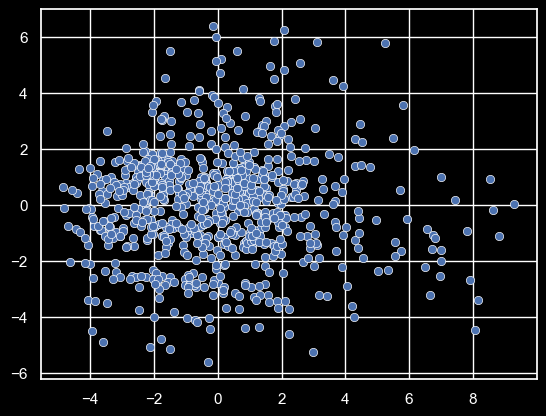

In [109]:

sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1])

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [141]:
# Probaemos varias opciones de clasificación binaria y evaluaremos todas con la función
# de classification_report de sklearn (y una matriz de confusión, que es más visual).

# Empezamos con regresión logística:

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=110)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.89      0.80      0.84        10

    accuracy                           0.98       161
   macro avg       0.94      0.90      0.92       161
weighted avg       0.98      0.98      0.98       161

[[150   1]
 [  2   8]]


In [138]:
# Seguimos con una Máquina de Vectores de soporte.

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       152
           1       0.60      0.67      0.63         9

    accuracy                           0.96       161
   macro avg       0.79      0.82      0.80       161
weighted avg       0.96      0.96      0.96       161

[[148   4]
 [  3   6]]


In [139]:
# Sigamos con un árbol de decisión
from sklearn.tree import DecisionTreeClassifier

# Ambos criterios 'gini' y 'entropy' dan los mismos resultados en este caso.
dectree = DecisionTreeClassifier(criterion='entropy',max_depth=None)
dectree.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       152
           1       0.57      0.44      0.50         9

    accuracy                           0.95       161
   macro avg       0.77      0.71      0.74       161
weighted avg       0.95      0.95      0.95       161

[[149   3]
 [  5   4]]


In [136]:
# Por último, repitamos el proceso para un algoritmo de KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       143
           1       0.90      0.50      0.64        18

    accuracy                           0.94       161
   macro avg       0.92      0.75      0.80       161
weighted avg       0.94      0.94      0.93       161

[[142   1]
 [  9   9]]


### Conclusión

Si se ejecutan todas las celdas, se puede ver en las últimas los resultados de cada modelo con el reporte de predicción de sklearn (conteniendo varias métricas) seguido de la matriz de confusión obtenida para cada predicción.

Vale la pena recordar que la matriz de confusión que confecciona sklearn tiene la siguiente distribución:

|                  | **Predicción Positiva** | **Predicción Negativa** |
|------------------|:-----------------------:|:-----------------------:|
| **Clase Positiva** |           TP           |           FN            |
| **Clase Negativa** |           FP           |           TN            |


Debido a la naturaleza de la problemática abordada, y la distribución de los positivos en el dataset, es importante notar que métricas como el accuracy casi carecen de sentido (sólo alrededor del 10% de los pokemones del dataset son legendarios, así que este tipo de métricas darán alto siempre).

Es posible que conseguir mejores resultados sea posible con algo más de pre-procesamiento, pero dentro de todo se puede decir que los modelos alcanzan un nivel aceptable de performance.

Personalmente creo que un nivel bajo de falsos negativos (es decir, no detectar legendarios que sí lo son) es lo más importante siempre y cuando no sean demasiado elevados los falsos positivos. Todos los modelos parecen llegar a ese equilibrio.